# Social Network Ads

In [362]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [363]:
df=pd.read_csv('Social_Network_Ads.csv')

In [364]:
data=pd.DataFrame(df)

In [365]:
data.head(5)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [366]:
data.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [367]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,400.0,37.6550,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,69742.5000,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,0.3575,0.479864,0.0,0.00,0.0,1.0,1.0


<AxesSubplot:xlabel='Age', ylabel='Density'>

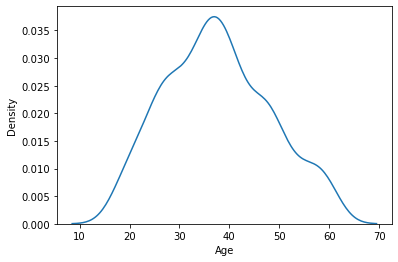

In [368]:
sns.kdeplot(data['Age'])


<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

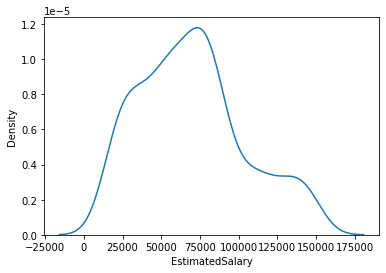

In [369]:
sns.kdeplot(data['EstimatedSalary'])

In [370]:
bins=[17,30,42,54,60]
labels=['17-30','30-42','42-54','Above 54']
data['Age_recoded']=pd.cut(data['Age'],bins=bins,labels=labels,right=True)

In [371]:
data.head(10)

,Age,EstimatedSalary,Purchased,Age_recoded
0,19,19000,0,17-30
1,35,20000,0,30-42
2,26,43000,0,17-30
3,27,57000,0,17-30
4,19,76000,0,17-30
5,27,58000,0,17-30
6,27,84000,0,17-30
7,32,150000,1,30-42
8,25,33000,0,17-30
9,35,65000,0,30-42


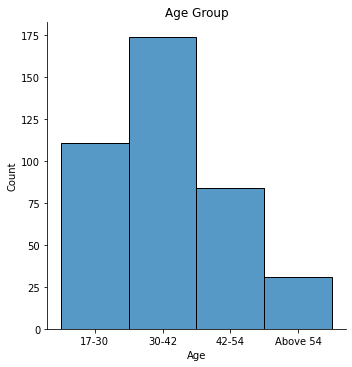

In [372]:
sns.displot(data['Age_recoded'])
plt.title('Age Group')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [373]:
pd.crosstab(data['Age_recoded'],data['Purchased'],normalize=True)*100

Purchased,0,1
Age_recoded,,
17-30,26.25,1.50
30-42,33.50,10.00
42-54,4.00,17.00
Above 54,0.50,7.25


In [374]:
data['EstimatedSalary'].value_counts()

72000     12
80000     11
79000     10
75000      9
71000      9
          ..
123000     1
37000      1
115000     1
148000     1
139000     1
Name: EstimatedSalary, Length: 117, dtype: int64

In [399]:
bins=[14000,30000,45000,60000,75000,90000,150000]
labels=['14000 to 30000','30000 to 45000','45000 to 60000', '60000 to 75000','75000 to 90000','Above 90000']
data['EstimatedSalary_recoded']=pd.cut(data['EstimatedSalary'],bins=bins,labels=labels,right=True)
data.head(10)

,Age,EstimatedSalary,Purchased,Age_recoded,EstimatedSalary_recoded
0,19,19000,0,17-30,14000 to 30000
1,35,20000,0,30-42,14000 to 30000
2,26,43000,0,17-30,30000 to 45000
3,27,57000,0,17-30,45000 to 60000
4,19,76000,0,17-30,75000 to 90000
5,27,58000,0,17-30,45000 to 60000
6,27,84000,0,17-30,75000 to 90000
7,32,150000,1,30-42,Above 90000
8,25,33000,0,17-30,30000 to 45000
9,35,65000,0,30-42,60000 to 75000


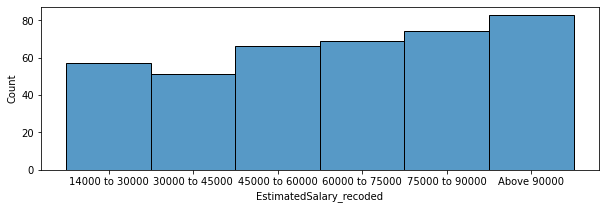

In [400]:
plt.figure(figsize=(10, 3))
sns.histplot(data['EstimatedSalary_recoded'])
plt.show()

In [401]:
data.head(5)

,Age,EstimatedSalary,Purchased,Age_recoded,EstimatedSalary_recoded
0,19,19000,0,17-30,14000 to 30000
1,35,20000,0,30-42,14000 to 30000
2,26,43000,0,17-30,30000 to 45000
3,27,57000,0,17-30,45000 to 60000
4,19,76000,0,17-30,75000 to 90000


In [402]:
pd.crosstab(data['Age_recoded'],data['EstimatedSalary_recoded'],normalize=True)*100

EstimatedSalary_recoded,14000 to 30000,30000 to 45000,45000 to 60000,60000 to 75000,75000 to 90000,Above 90000
Age_recoded,,,,,,
17-30,6.00,3.25,4.25,3.00,9.25,2.00
30-42,3.00,3.50,10.00,12.50,5.50,9.00
42-54,4.50,4.25,1.25,1.50,2.75,6.75
Above 54,0.75,1.75,1.00,0.25,1.00,3.00


In [403]:
pd.crosstab(data['EstimatedSalary_recoded'],data['Purchased'],normalize=True)*100

Purchased,0,1
EstimatedSalary_recoded,,
14000 to 30000,9.25,5.00
30000 to 45000,7.75,5.00
45000 to 60000,14.75,1.75
60000 to 75000,15.25,2.00
75000 to 90000,14.25,4.25
Above 90000,3.00,17.75


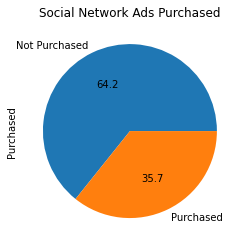

In [404]:
data['Purchased'].value_counts().plot(kind='pie',autopct='%1.1f',labels=['Not Purchased','Purchased'])
plt.title('Social Network Ads Purchased')
plt.show()


# Model Building 

In [381]:
data['Age']=data['Age'].astype(int)

In [405]:
data.head(5)

,Age,EstimatedSalary,Purchased,Age_recoded,EstimatedSalary_recoded
0,19,19000,0,17-30,14000 to 30000
1,35,20000,0,30-42,14000 to 30000
2,26,43000,0,17-30,30000 to 45000
3,27,57000,0,17-30,45000 to 60000
4,19,76000,0,17-30,75000 to 90000


In [406]:
data['EstimatedSalary'].describe()

count       400.000000
mean      69742.500000
std       34096.960282
min       15000.000000
25%       43000.000000
50%       70000.000000
75%       88000.000000
max      150000.000000
Name: EstimatedSalary, dtype: float64

In [416]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, LabelEncoder


In [408]:
x=data.drop('Purchased',axis=1)
y=data['Purchased']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [422]:
x_train.head(10)

,Age,EstimatedSalary,Age_recoded,EstimatedSalary_recoded
85,31,118000,30-42,Above 90000
69,31,68000,30-42,60000 to 75000
203,41,71000,30-42,60000 to 75000
379,58,23000,Above 54,14000 to 30000
261,36,144000,30-42,Above 90000
287,48,138000,42-54,Above 90000
293,37,77000,30-42,75000 to 90000
217,40,78000,30-42,75000 to 90000
0,19,19000,17-30,14000 to 30000
323,48,30000,42-54,14000 to 30000


In [415]:
age_recoder = [['17-30','30-42','42-54','Above 54']]
#salary_recoder=[[14000,30000,45000,60000,75000,90000,150000]]
salary_recoder = [['14000 to 30000','30000 to 45000','45000 to 60000','60000 to 75000','75000 to 90000','Above 90000']]

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

transformer = ColumnTransformer(
    transformers=[
        ('AGE', OrdinalEncoder(categories=age_recoder), ['Age_recoded']),
        ('SALARY', OrdinalEncoder(categories=salary_recoder), ['EstimatedSalary_recoded'])
    ],
    remainder='passthrough'
)

X_train_transformed = transformer.fit_transform(x_train)
X_test_transformed = transformer.transform(x_test)


In [419]:
models={
    "LogististicRegression":LogisticRegression(max_iter=100),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forect Classifier": RandomForestClassifier()
}

for name,model in models.items():
    model.fit(X_train_transformed, y_train)
    preds=model.predict(X_test_transformed)
    acc=accuracy_score(y_test,preds)
    print(f"{name} Accuracy {acc}")

LogististicRegression Accuracy 0.7
Decision Tree Classifier Accuracy 0.8875
Random Forect Classifier Accuracy 0.9


In [421]:
from sklearn.metrics import classification_report, confusion_matrix

best_model=RandomForestClassifier()
best_model.fit(X_train_transformed,y_train)
preds=best_model.predict(X_test_transformed)

print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
print("\nClassification Report:\n", classification_report(y_test, preds))

Confusion Matrix:
 [[51  5]
 [ 3 21]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.93        56
           1       0.81      0.88      0.84        24

    accuracy                           0.90        80
   macro avg       0.88      0.89      0.88        80
weighted avg       0.90      0.90      0.90        80



In [432]:
def prediction(age,salary,age_recoded,est_recoded):
    pred=best_model.predict([[age, salary,age_recoded,est_recoded]])[0]
    return "Purchased" if pred==1 else "Not Purchased"

print(prediction(35,50000,3,5000))

Not Purchased
